In [1]:
import prodimopy.read as pread
import prodimopy.plot as pplot
import prodimopy.plot_models as ppms
from matplotlib.backends.backend_pdf import PdfPages
import pickle
from tqdm import tqdm
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from scipy.constants import h as planck_h
from scipy.constants import k as boltzmann_k
from scipy.constants import c as speed_of_light
from scipy.constants import astronomical_unit as au
from scipy.constants import parsec as pc
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
with open('AllModels.pkl', 'rb') as f:
    models = pickle.load(f)

In [3]:
# with open('ModelData.pkl', 'rb') as f:
#     df = pickle.load(f)

In [2]:
models = list()
model_names = ['C_-0.5_O_-0.5_CO_0.45', 'C_-0.5_O_-0.25_CO_0.2570', 'C_-0.5_O_0.0_CO_0.145', 'C_-0.5_O_0.25_CO_0.0813', 'C_-0.5_O_0.5_CO_0.045', 'C_-0.25_O_-0.5_CO_0.813', 'C_-0.25_O_-0.25_CO_0.45', 'C_-0.25_O_0.0_CO_0.257', 'C_-0.25_O_0.25_CO_0.145', 'C_-0.25_O_0.5_CO_0.0813', 'C_0.0_O_-0.5_CO_1.445', 'C_0.0_O_-0.25_CO_0.813', 'C_0.0_O_0.0_CO_0.45', 'C_0.0_O_0.25_CO_0.257', 'C_0.0_O_0.5_CO_0.145', 'C_0.25_O_-0.5_CO_2.570', 'C_0.25_O_-0.25_CO_1.445', 'C_0.25_O_0.0_CO_0.813', 'C_0.25_O_0.25_CO_0.45', 'C_0.25_O_0.5_CO_0.2570', 'C_0.5_O_-0.5_CO_4.57', 'C_0.5_O_-0.25_CO_2.570', 'C_0.5_O_0.0_CO_1.445', 'C_0.5_O_0.25_CO_0.813', 'C_0.5_O_0.5_CO_0.45']
for model in model_names:
    a = pread.read_prodimo('./models/'+model)
    models.append(a)

READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\ProDiMo.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\Species.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\FlineEstimates.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\Elements.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\dust_opac.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\dust_sigmaa.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\StarSpectrum.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\SED.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\SEDana.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\image.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.5_CO_0.45\Parameter.out  ...
INFO: Reading time:  17.33 s
 
READ: Reading File:  ./models/C_-0.5_O_-0.25_CO_0.2570\ProDiMo.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.25_CO_0.2570\Species.out  ...
READ: Reading File:  ./models/C_-0.5_O_-0.25_CO_0.25

In [3]:
with open('AllModels.pkl', 'wb') as f:
    pickle.dump(models, f)

In [5]:
print(plt.style.available)
plt.style.use("default")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
colors = [
    "red", "blue", "green", "orange", "purple", "brown", "pink", "gray",
    "olive", "cyan", "magenta", "gold", "lime", "navy", "teal", "maroon",
    "coral", "darkgreen", "skyblue", "violet", "chocolate", "crimson",
    "darkgray", "turquoise", "orchid"
]

PLOT: plot_NH ...


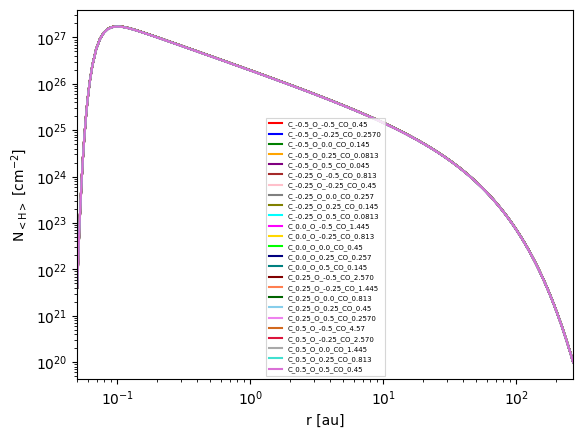

In [7]:
pms=ppms.PlotModels(None, colors=colors, fs_legend=5)
pms.plot_NH(models, xlog=True)
plt.show()

PLOT: plot_tcdspec ...


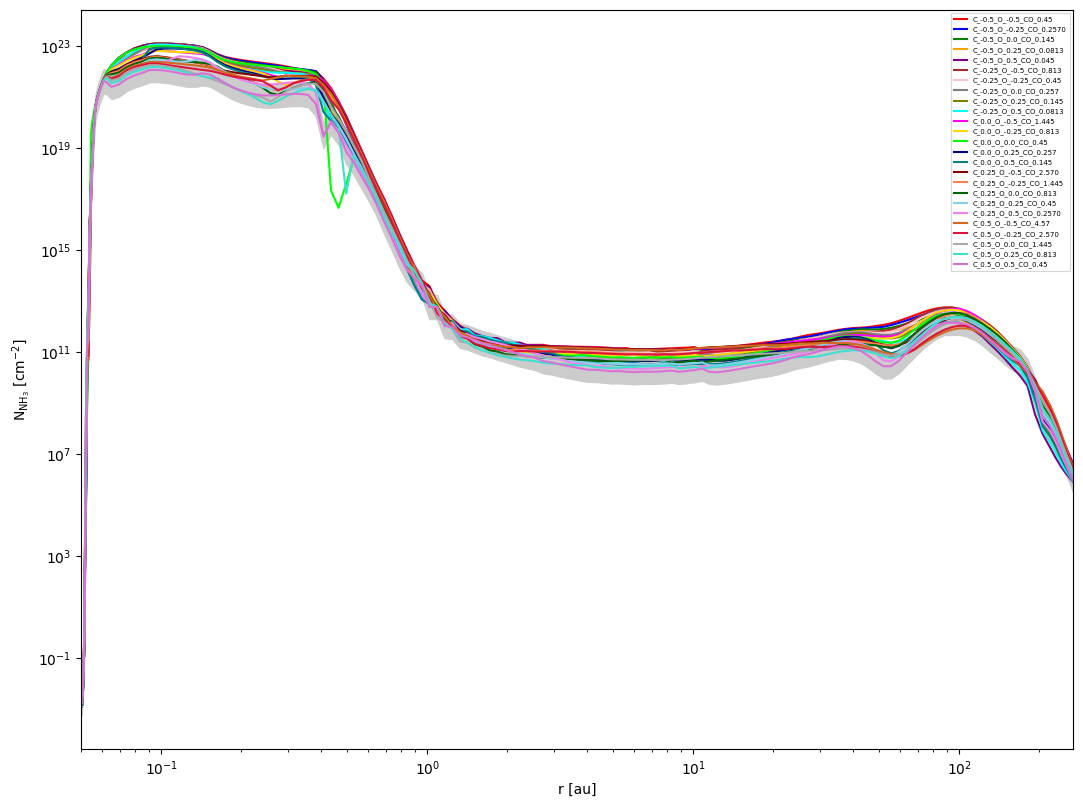

In [8]:
pms.plot_tcdspec(models, 'NH3', xlog=True, sfigs=[2, 2])
plt.show()

PLOT: plot_tauline ...


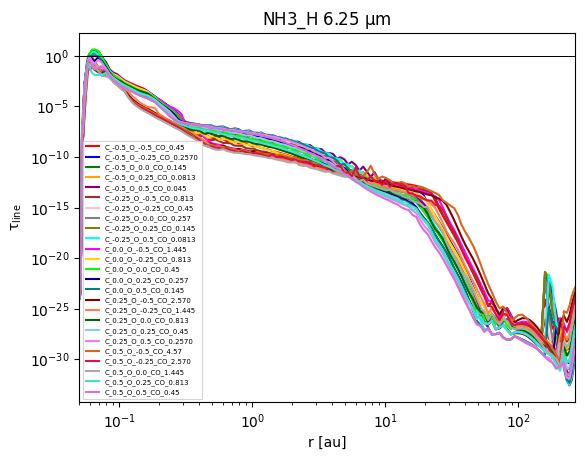

In [9]:
pms.plot_tauline(models, ['NH3_H', 6.25])
plt.show()

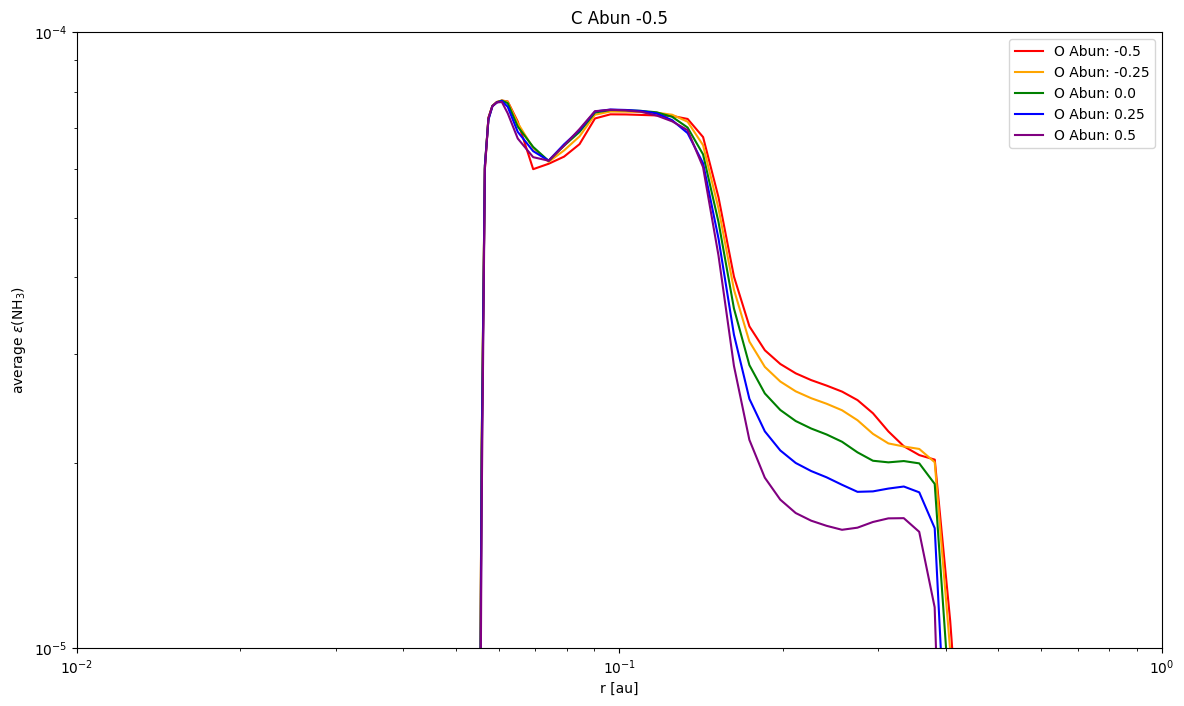

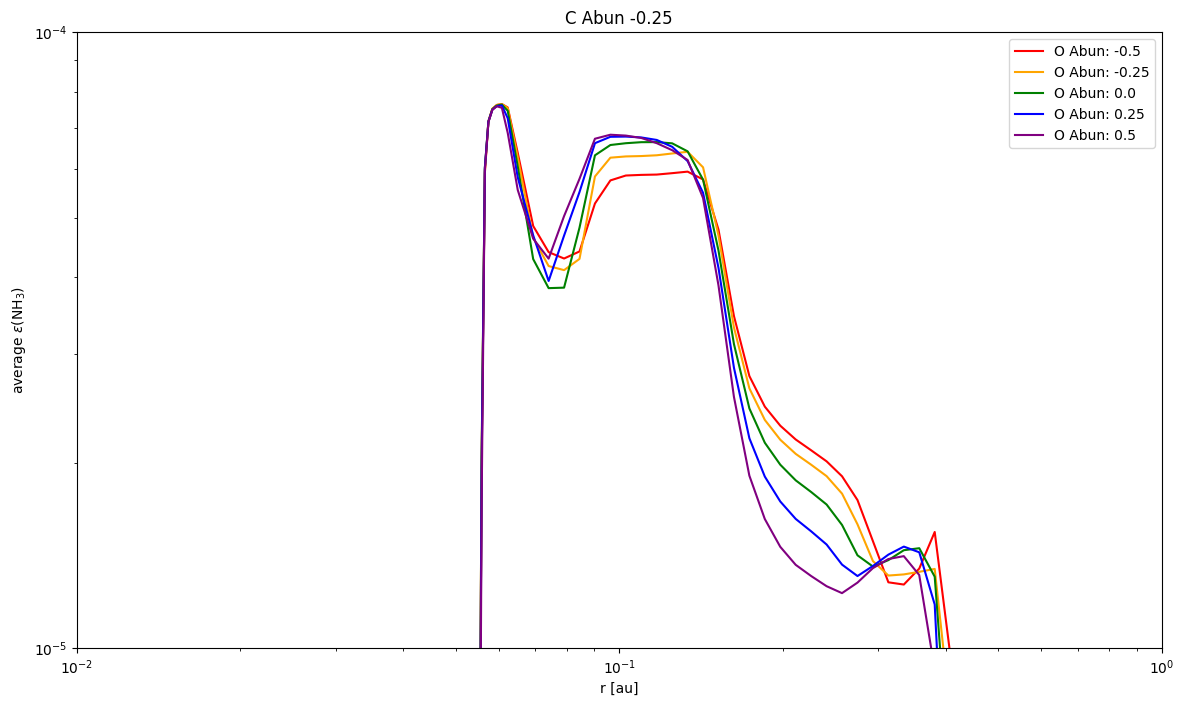

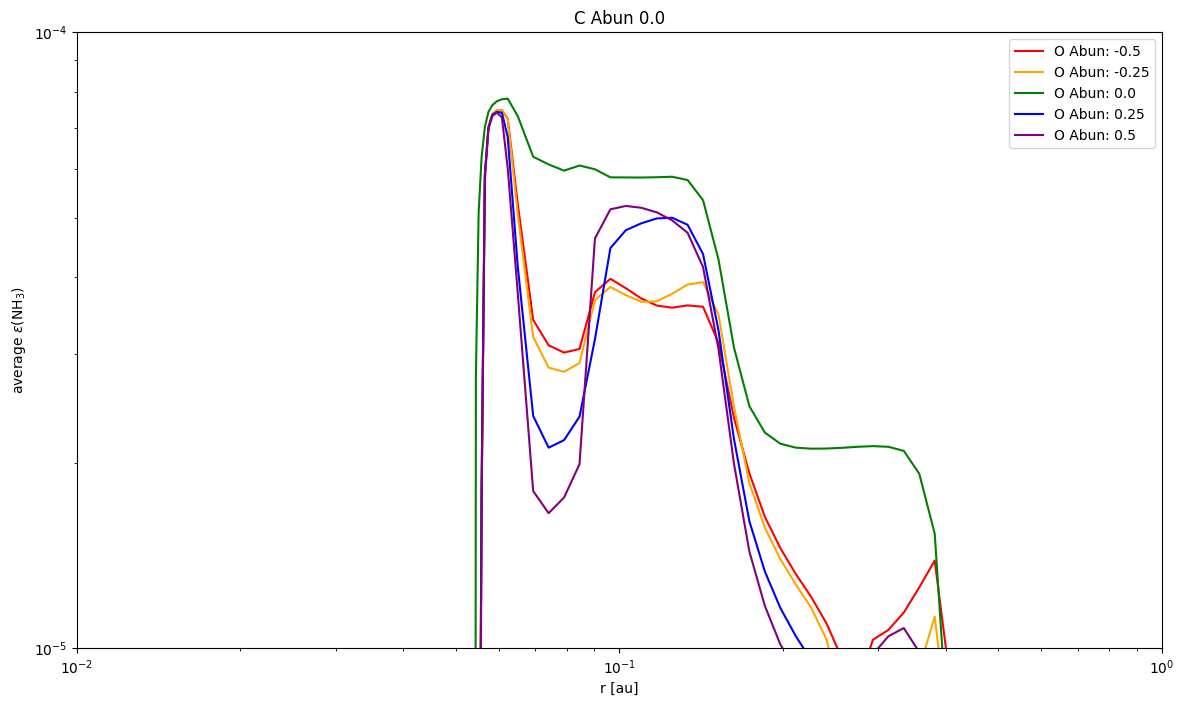

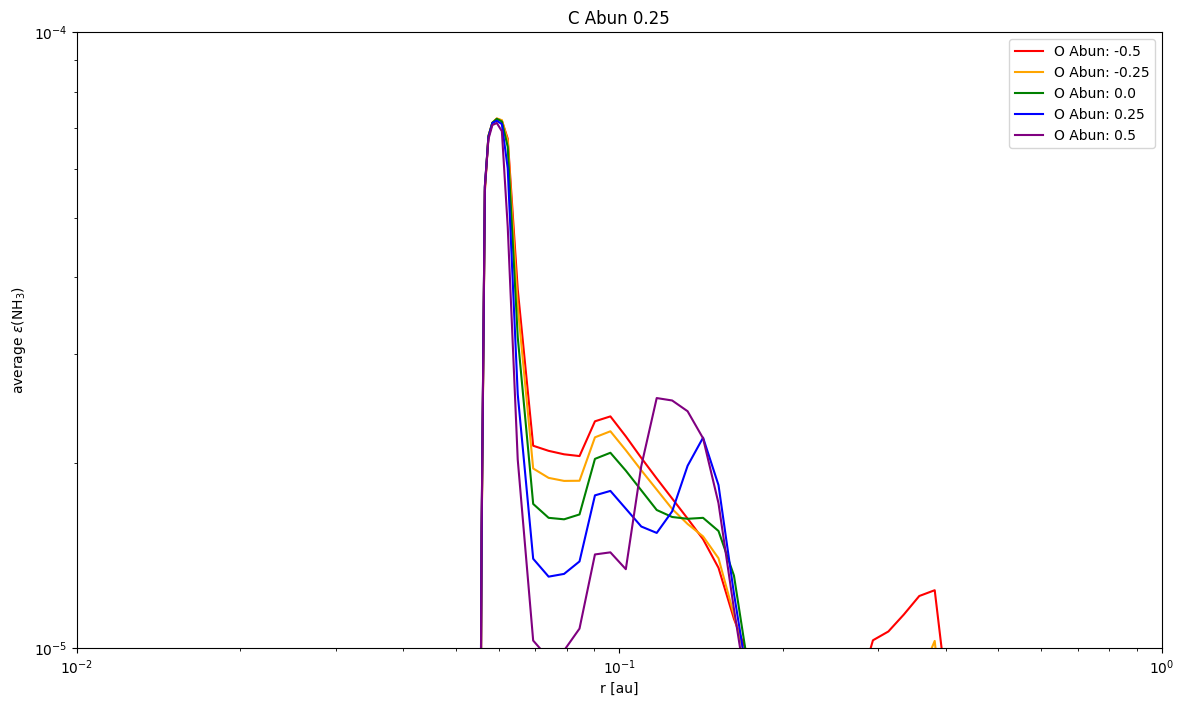

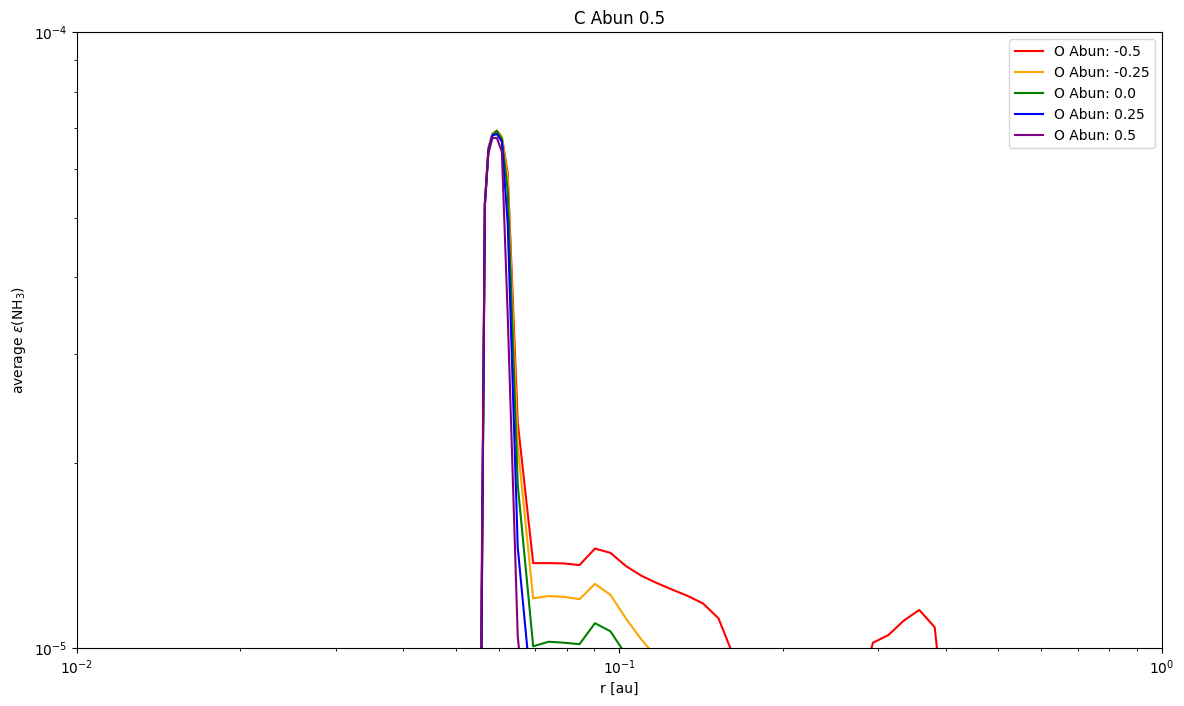

<Figure size 1400x800 with 0 Axes>

In [33]:
import re

pattern = r'C_(.*?)_O_(.*?)_CO'

for specie in ['NH3']:
    # fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    plt.figure(figsize=(14, 8))
    for i, model in enumerate(models):
        # get the species
        
        match = re.search(pattern, model.name)
        C_value = match.group(1)
        O_value = match.group(2)
        if (specie in model.spnames):
            if O_value == '-0.5':
                color = 'red'
            elif O_value == '-0.25':
                color = 'orange'
            elif O_value == '0.0':
                color = 'green'
            elif O_value == '0.25':
                color = 'blue'
            elif O_value == '0.5':
                color = 'purple'
            y = model.cdnmol[:, 0, model.spnames[specie]]
            y = y / model.NHver[:, 0]
            x = model.x[:, 0]
            plt.plot(x, y, marker=None, color=color, label=f'O Abun: {O_value}') #colors[iplot]
            if i % 5 == 4:
                plt.title(f'C Abun {(i // 5) / 4 - 0.5}')
                plt.xlabel(r"r [au]")
                plt.ylabel(r"average $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
                plt.xlim([1e-2, 1])
                plt.ylim([1e-5, 1e-4])
                plt.xscale('log')
                plt.yscale('log')
                plt.legend()
                plt.show()
                plt.figure(figsize=(14, 8))
    # ax.set_xlabel(r"r [au]")
    # ax.set_ylabel(r"average $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
    # 
    # # do axis style
    # ax.semilogx()
    # ax.semilogy()
    # # ax.set_ylim([1e-8, 1e-2])
    # ax.set_xlim([None, 1])
    # ax.legend()
    # plt.savefig(f'Abundances_{specie}.png')
    # plt.show()

PLOT: plot_abunvert ...


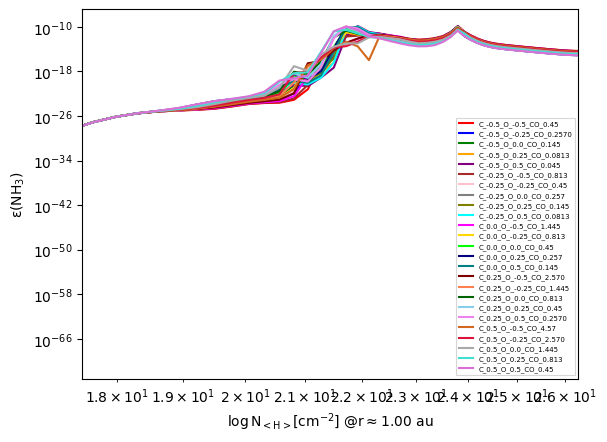

In [11]:
pms.plot_abunvert(models, 1, 'NH3', xlog=True)
plt.show()

PLOT: plot_tauline ...


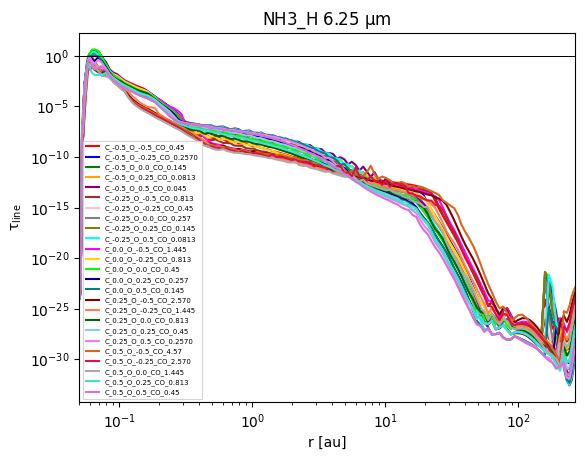

In [12]:
pms.plot_tauline(models, ['NH3_H', 6.25])
plt.show()

In [13]:
# with open("AllModels.pkl", "wb") as file:
#     pickle.dump(models, file)

In [14]:
# with open('AllModels.pkl', 'rb') as f:
#     models = pickle.load(f)

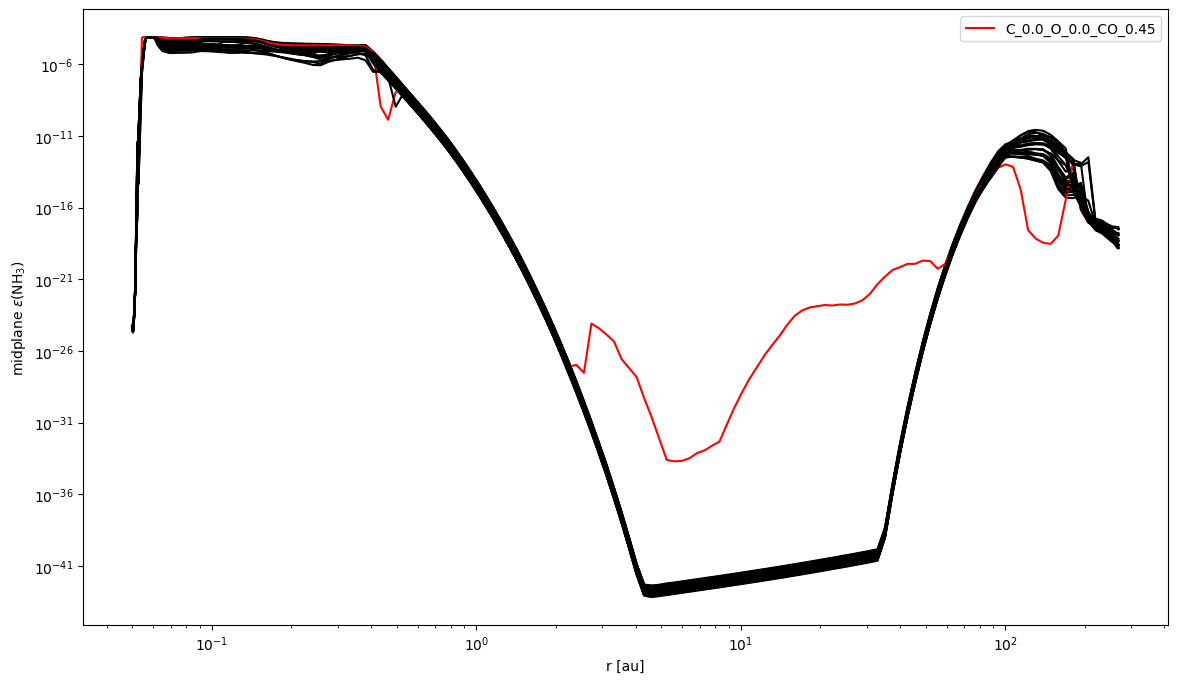

In [15]:
specie = 'NH3'
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
iplot = 0
xmin = 1.e100
xmax = 0
for model in models:
    x = model.x[:, 0]
    y = model.nmol[:, 0, model.spnames[specie]] / model.nHtot[:, 0]

    # this is not general, removed it
    # if iplot==0 or iplot==(len(models)-1):
    #  line,=ax.plot(x,y,self.styles[iplot],marker=None,color=self.colors[iplot],label=model.name,linewidth=2.5)
    # else:
    if model.name == 'C_0.0_O_0.0_CO_0.45':
        ax.plot(x, y, marker=None, color='red', label=model.name)
    else:
        ax.plot(x, y, marker=None, color='black')  #colors[iplot]
    # ax.plot(x, y, self.styles[iplot], marker=None, color=self.colors[iplot], label=model.name)

    iplot = iplot + 1
ax.semilogy()
ax.semilogx()
ax.set_xlabel(r"r [au]")
ax.set_ylabel(r"midplane $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
ax.legend()
plt.savefig(f'Midplane_Abundance_{specie}.png')
plt.show()

In [16]:
# plt.close('all')
# specie = 'NO'
# for i in range(25):
#     if df['O Value'][i] == '-0.5':
#         color = 'red'
#     elif df['O Value'][i] == '-0.25':
#         color = 'orange'
#     elif df['O Value'][i] == '0.0':
#         color = 'green'
#     elif df['O Value'][i] == '0.25':
#         color = 'blue'
#     elif df['O Value'][i] == '0.5':
#         color = 'purple'
#     plt.plot(df[f'FLiTs {specie} Wavelength'][i], df[f'FLiTs {specie} Flux'][i], color=color,
#              label=f"O Abun: {df['O Value'][i]}")
#     if i % 5 == 4:
#         plt.title(f'C Abun {(i // 5) / 4 - 0.5}')
#         plt.xlim(5.33, 5.35)
#         plt.xlabel(r'Wavelength ($\mu$m)')
#         plt.ylabel('Flux (Jy)')
#         plt.legend()
#         plt.show()

TypeError: PlotModels.plot_lineprofile() missing 1 required positional argument: 'wl'

PLOT: plot_abuncont ...


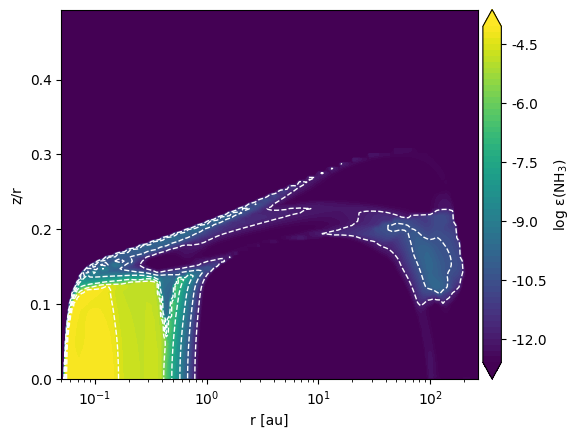

PLOT: plot_abuncont ...


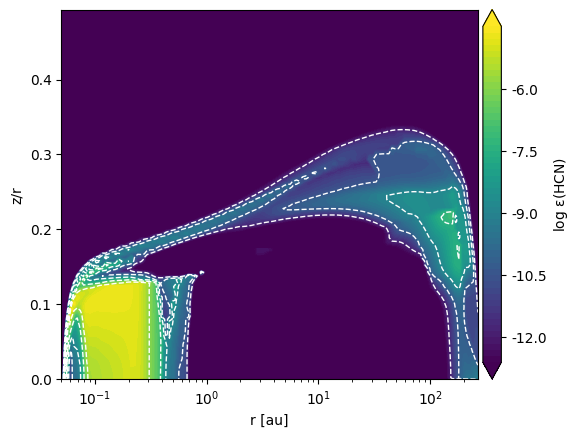

PLOT: plot_abuncont ...


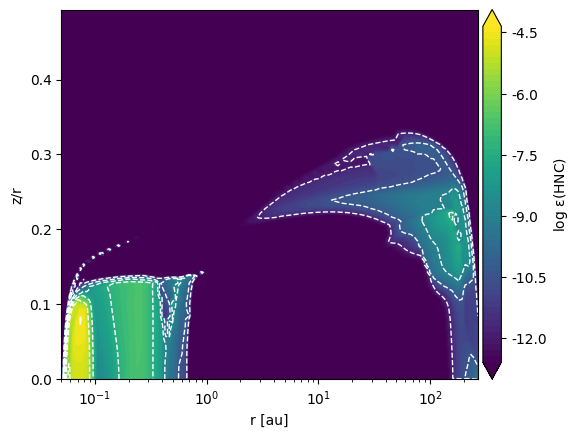

PLOT: plot_abuncont ...


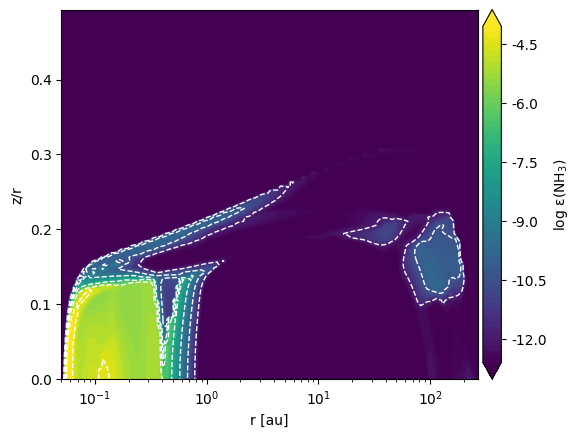

PLOT: plot_abuncont ...


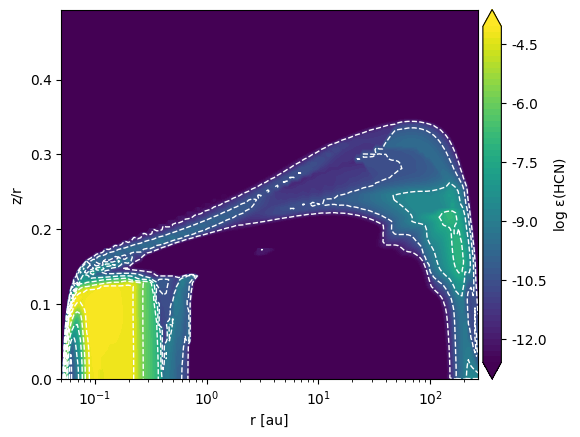

PLOT: plot_abuncont ...


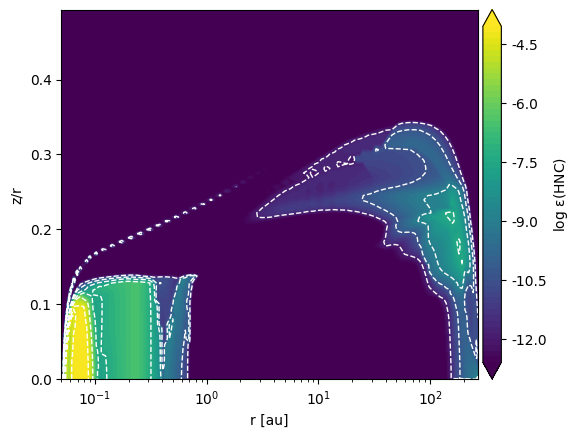

In [43]:
for index, model in enumerate(models):
    pp = pplot.Plot(None)
    if index == 4 or index == 19:
        pp.plot_abuncont(model, 'NH3')
        plt.show()
        pp.plot_abuncont(model, 'HCN')
        plt.show()
        pp.plot_abuncont(model, 'HNC')
        plt.show()